<a href="https://colab.research.google.com/github/NaraineSurya/Pytorch-Basics/blob/master/Sample_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Epoch = 0 : Loss = 2159.118896484375
Epoch = 10 : Loss = 1634.830322265625
Epoch = 20 : Loss = 1261.022705078125
Epoch = 30 : Loss = 993.9640502929688
Epoch = 40 : Loss = 802.8075561523438
Epoch = 50 : Loss = 665.7379760742188
Epoch = 60 : Loss = 567.2897338867188
Epoch = 70 : Loss = 496.472412109375
Epoch = 80 : Loss = 445.4592590332031
Epoch = 90 : Loss = 408.6639709472656


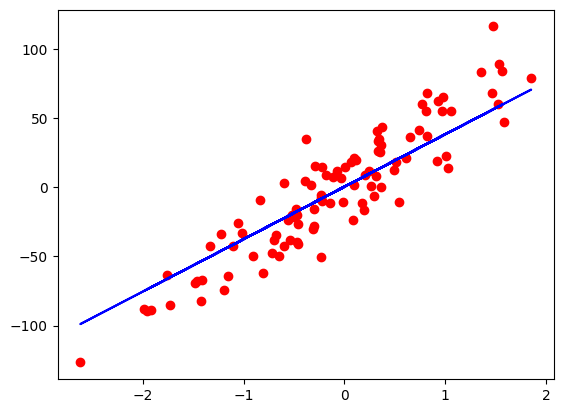

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare Data
# 1) Model
# 2) Loss and optimizer
# 3) Training Loop/Pipeline


# 0) Prepare Data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # Column Vector

# 1) Model
class LinearRegression(nn.Module):
  def __init__(self, input_dim: int, output_dim: int):
    super(LinearRegression, self).__init__()
    self.Lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.Lin(x)

n_samples, n_features = X.shape
input_size = n_features
output_size = 1
model = LinearRegression(input_size, output_size)

# 2) Loss and Optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), learning_rate)


# Training Loop
epochs = 100

for epoch in range(epochs):
  # Prediction
  y_pred = model(X)

  # Loss Calculation
  loss = criterion(y_pred, y)

  # Gradient Calculation
  loss.backward()

  # Update Parameters
  optimizer.step()

  # Zero the Gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"Epoch = {epoch} : Loss = {loss.item()}")

# 5) Plotting
predicted = model(X).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()



# **Logistic Regression**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare Data
dataset = datasets.load_breast_cancer()
X_numpy, y_numpy = dataset.data, dataset.target

print(X_numpy.shape)
n_samples, n_features = X_numpy.shape

X_train, X_test, y_train, y_test = train_test_split(X_numpy, y_numpy, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model

class LogisticRegression(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegression, self).__init__()
    self.Lin = nn.Linear(input_dim, 1)

  def forward(self, X):
    y_predicted = self.Lin(X)
    return torch.sigmoid(y_predicted)

model = LogisticRegression(n_features)

# 2) Loss and optimizer
criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

# 3) Training Loop
epochs = 100

for epoch in range(epochs):
  y_pred = model(X_train)

  loss = criterion(y_pred, y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f"Epoch = {epoch} : loss = {loss}")

with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f"Accuracy = {acc}")


(569, 30)
Epoch = 0 : loss = 0.8113929033279419
Epoch = 10 : loss = 0.6202972531318665
Epoch = 20 : loss = 0.5122299194335938
Epoch = 30 : loss = 0.4442194402217865
Epoch = 40 : loss = 0.39737993478775024
Epoch = 50 : loss = 0.3629484176635742
Epoch = 60 : loss = 0.3363974392414093
Epoch = 70 : loss = 0.3151700794696808
Epoch = 80 : loss = 0.29771688580513
Epoch = 90 : loss = 0.2830449640750885
Accuracy = 0.9649122953414917


# **Feed Forward Neural Network**

torch.Size([100, 1, 28, 28]) torch.Size([100])
Epoch = 1 / 2 : Step = 100 / 600 : Loss = 0.3632
Epoch = 1 / 2 : Step = 200 / 600 : Loss = 0.3094
Epoch = 1 / 2 : Step = 300 / 600 : Loss = 0.2800
Epoch = 1 / 2 : Step = 400 / 600 : Loss = 0.3531
Epoch = 1 / 2 : Step = 500 / 600 : Loss = 0.2949
Epoch = 1 / 2 : Step = 600 / 600 : Loss = 0.2870
Epoch = 2 / 2 : Step = 100 / 600 : Loss = 0.1972
Epoch = 2 / 2 : Step = 200 / 600 : Loss = 0.2339
Epoch = 2 / 2 : Step = 300 / 600 : Loss = 0.2172
Epoch = 2 / 2 : Step = 400 / 600 : Loss = 0.2950
Epoch = 2 / 2 : Step = 500 / 600 : Loss = 0.1348
Epoch = 2 / 2 : Step = 600 / 600 : Loss = 0.2253
Accuracy = 95.37


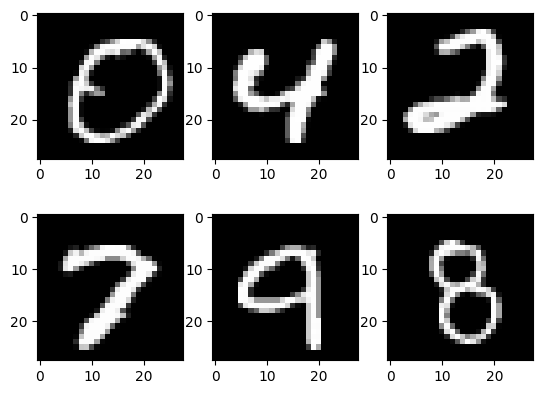

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyper params
input_size = 784 # 28x28 pixel img
hidden_size = 100
num_classes = 10
epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap="gray")
# plt.show()

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.L1 = nn.Linear(input_size, hidden_size)
    self.reLu = nn.ReLU()
    self.L2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.L1(x)
    out = self.reLu(out)
    out = self.L2(out)
    return out

# Model
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    output = model(images)
    loss = criterion(output, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i+1) % 100 == 0:
      print(f"Epoch = {epoch+1} / {epochs} : Step = {i+1} / {n_total_steps} : Loss = {loss.item():.4f}")

# test
with torch.no_grad():
  num_correct = 0
  num_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    output = model(images)

    # highest_value , index
    _, predictions = torch.max(output, 1)
    num_samples += labels.shape[0]
    num_correct += (predictions == labels).sum().item()
  acc = 100 * num_correct / num_samples
  print(f"Accuracy = {acc}")